# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [2]:
# If this cell does not work try running `pip install nbformat`

import io
from IPython import nbformat

nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

/home/raphael/.local/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Word count: 373


## Group Number :

## Student 1 
### Name : Yuan Tian
### ID : 5816971

## Student 2
### Name : Raphael Frühwirth
### ID : 5897297

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")


## 1. Visualization task – 1 A4

### 1a. Plot visulations

In [21]:
# change categorical features into numerical and normalize amount to $ according to their currencycode
def process_df(df):
  exchange_rates = {
        'USD': 1.0,
        'GBP': 1.42,
        'AUD': 0.73,
        'SEK': 0.12,
        'MXN': 0.049,
        'NZD': 0.65
        }

  def normalize_amount(row):
      currency_code = row['currencycode']
      amount = row['amount']
      exchange_rate = exchange_rates[currency_code]
      return amount * exchange_rate

  df['amount'] = df.apply(normalize_amount, axis=1)
  df['accountcode'] = df['accountcode'].astype('category').cat.codes
  df['txvariantcode'] = df['txvariantcode'].astype('category').cat.codes
  df['issuercountrycode'] = df['issuercountrycode'].astype('category').cat.codes
  df['currencycode'] = df['currencycode'].astype('category').cat.codes
  df['shoppercountrycode'] = df['shoppercountrycode'].astype('category').cat.codes
  df['shopperinteraction'] = df['shopperinteraction'].astype('category').cat.codes
  df['cardverificationcodesupplied'] = df['cardverificationcodesupplied'].astype('category').cat.codes

  df['mail_id'] = df['mail_id'].astype('category').cat.codes
  df['ip_id'] = df['ip_id'].astype('category').cat.codes
  df['card_id'] = df['card_id'].astype('category').cat.codes

  df.to_csv("cda-lab-1-credit-card-fraud/processed.csv", index=False)

  return df

Text(0.5, 1.0, 'Fraud/Non-Fraud by accountcode')

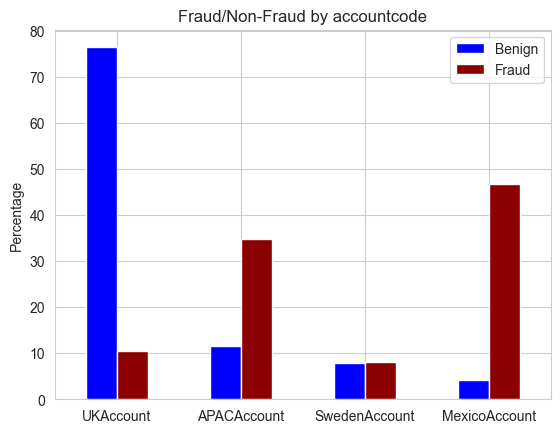

In [8]:
index = "accountcode"
top = 5
transactions = df[index].value_counts()[:top]
frauds = df.groupby(index)['label'].sum()

df['label'] = df['label'].replace({0: 1, 1: 0})
benign = df.groupby(index)['label'].sum()

frauds = (100. * frauds / frauds.sum()).round(1)
transactions = (100. * transactions / transactions.sum()).round(1)
benign = (100. * benign/benign.sum()).round(1)

df_viz = pd.DataFrame({"Benign": benign, "Fraud": frauds}, index=df[index].unique()[:top])
ax = df_viz.plot.bar(rot=0, color=["blue", "darkred"])
plt.ylabel("Percentage")
plt.title(f"Fraud/Non-Fraud by {index}")

   Id  issuercountrycode  txvariantcode     bin   amount  currencycode  \
0   1                 38              2  546097   6390.0             1   
1   2                 38              3  557349   4820.9             1   
2   3                 38              2  542011   5530.9             1   
3   4                 38              8  465943  21789.9             1   
4   6                 38              8  475127   7234.9             1   

   shoppercountrycode  shopperinteraction  cardverificationcodesupplied  \
0                  46                   1                             1   
1                  46                   1                             1   
2                  46                   1                             1   
3                  46                   0                             0   
4                  46                   1                             1   

   cvcresponsecode  accountcode  mail_id   ip_id  card_id  label  
0                1            3    17

<AxesSubplot: >

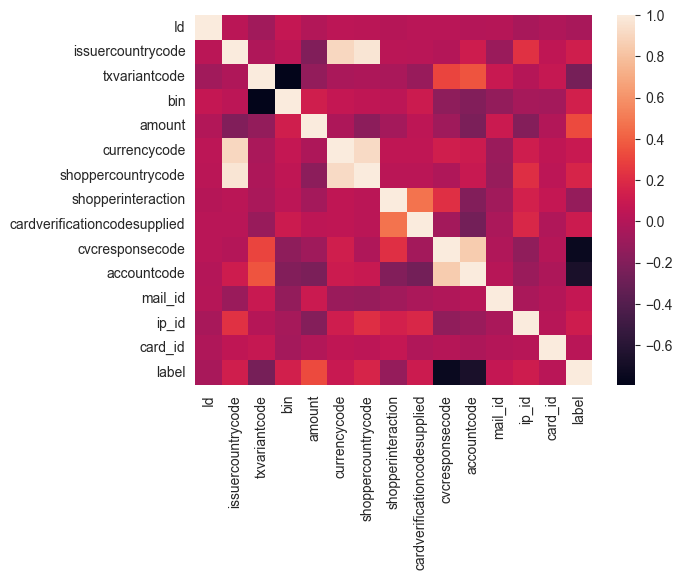

In [9]:
df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
df = process_df(df)
print(df.head())
num = len(df[df["label"]==1])
non_fraud = df[df["label"] == 0].sample(num, random_state=12)
fraud = df[df["label"] == 1].sample(num, random_state=12)

corr_mat = pd.concat([non_fraud, fraud]).corr()
sns.heatmap(corr_mat)

   Id  issuercountrycode  txvariantcode     bin   amount  currencycode  \
0   1                 38              2  546097   6390.0             1   
1   2                 38              3  557349   4820.9             1   
2   3                 38              2  542011   5530.9             1   
3   4                 38              8  465943  21789.9             1   
4   6                 38              8  475127   7234.9             1   

   shoppercountrycode  shopperinteraction  cardverificationcodesupplied  \
0                  46                   1                             1   
1                  46                   1                             1   
2                  46                   1                             1   
3                  46                   0                             0   
4                  46                   1                             1   

   cvcresponsecode  accountcode  mail_id   ip_id  card_id  label  
0                1            3    17

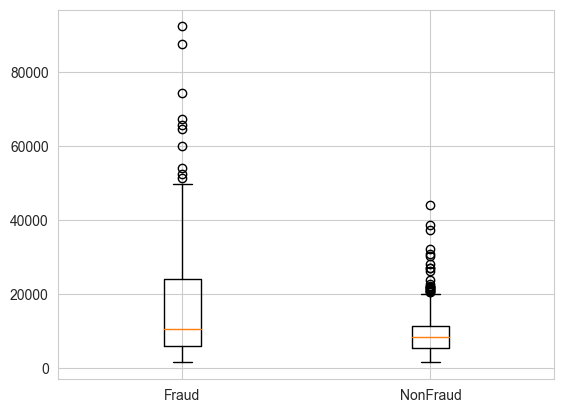

In [14]:
feature = "amount"

df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
df = process_df(df)
print(df.head())

num = len(df[df["label"]==1])
non_fraud = df[df["label"] == 0].sample(num, random_state=42)
fraud = df[df["label"] == 1].sample(num, random_state=42)

dic = {"Fraud": fraud[feature], "NonFraud": non_fraud[feature]}
plt.boxplot(dic.values())
plt.xticks(range(1, len(dic.keys())+1), dic.keys())
plt.show()

### 1b. Describe the visualizations and provide relavant explanations of features and relations.

The bar chart displays the percentage of fraudulent and non-fraudulent transactions for common account codes. Fraudulent cases are significantly higher for APACAccount and MexicoAccount, indicating that account code is an important factor in fraud occurrence.

The heatmap illustrates the correlation between different features, with color representing the degree of correlation. To address class imbalance, we randomly sampled an equal number of non-fraudulent and fraudulent cases. The results indicate a strong correlation between cvcresponsecode and accountcode and both cvc and accountcode have a negative impact on the label.

The box plot demonstrates the distribution of transaction amounts. Larger amounts are more likely to be fraud cases, while non-fraud cases primarily fall within 10,000. In contrast, fraud cases frequently exceed 10,000.

## 2. Imbalance task – 1 A4 – Individual

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

In [49]:
# rank swapping

def get_random_index(current_index, n_swapped_df, p):
    left = max(0, current_index - int(p * n_swapped_df))
    right = min(n_swapped_df - 1, current_index + int(p * n_swapped_df))

    random_index = random.randint(left, right)
    return random_index


# independently swapping
def rank_swapping(swapped_df):
    p = 0.1

    # select features
    features = list(swapped_df.columns)
    feature_index = range(1, 14)
    features = [features[i] for i in feature_index]
    print("swapped features:\n", features)

    for feature in ['amount']:
        sorted_df = swapped_df.sort_values(feature).reset_index(drop=True)
        # print("sorted:\n",sorted_df)
        # print("after being sorted:\n",sorted_df)
        # print("swapped_df:\n",swapped_df)
        for i, row in swapped_df.iterrows():
            try:
                current_index = sorted_df.index[sorted_df[feature] == swapped_df.iloc[i][feature]].tolist()[0]
            except:
                print(sorted_df[feature] == swapped_df.iloc[i][feature])
                print(sorted_df.index[sorted_df[feature] == swapped_df.iloc[i][feature]])
            # print("cur:\n",current_index)
            random_index = get_random_index(current_index, len(swapped_df), p)
            swapped_df.loc[i, feature] = sorted_df.iloc[random_index][feature]
        print("after swapping:\n", swapped_df)
    return swapped_df

df = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
swapped_df = df.copy()
# print(swapped_df.columns)
swapped_df = rank_swapping(swapped_df)
print("after rank swapping:\n",swapped_df)

swapped features:
 ['issuercountrycode', 'txvariantcode', 'bin', 'amount', 'currencycode', 'shoppercountrycode', 'shopperinteraction', 'cardverificationcodesupplied', 'cvcresponsecode', 'accountcode', 'mail_id', 'ip_id', 'card_id']
after swapping:
             Id issuercountrycode txvariantcode     bin  amount currencycode  \
0            1                GB      mccredit  546097    3750          GBP   
1            2                GB       mcdebit  557349    3850          GBP   
2            3                GB      mccredit  542011    4595          GBP   
3            4                GB     visadebit  465943   12375          GBP   
4            6                GB     visadebit  475127    6000          GBP   
...        ...               ...           ...     ...     ...          ...   
189623  237030                GB      mccredit  522948   12750          GBP   
189624  237031                GB     visadebit  475128    1200          GBP   
189625  237032                GB     vis

### 3a. Print ROC curves

In [24]:
# scale data
def scale(df):
    scaler = MinMaxScaler()
    c = df.columns
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df, columns=c)
    return df

In [51]:
def test_model2(classifier=LogisticRegression(), with_smote=False, use_test=False):

    print("Testing Model with regular data")
    model = classifier
    model.fit(train.drop("label", axis=1), train["label"])
    predictions = model.predict(test.drop("label", axis=1))
    pred_proba = model.predict_proba(test.drop("label", axis=1))


    tn, fp, fn, tp = confusion_matrix(test['label'], predictions).ravel()
    print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)
    print(classification_report(test["label"], predictions, zero_division=0))
    return predictions, pred_proba

In [52]:
def plot_roc_curve(y_test, y_pred):
    #plot roc curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

Testing Model with regular data
True negatives:  37871 
False positives:  0 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37871
         1.0       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



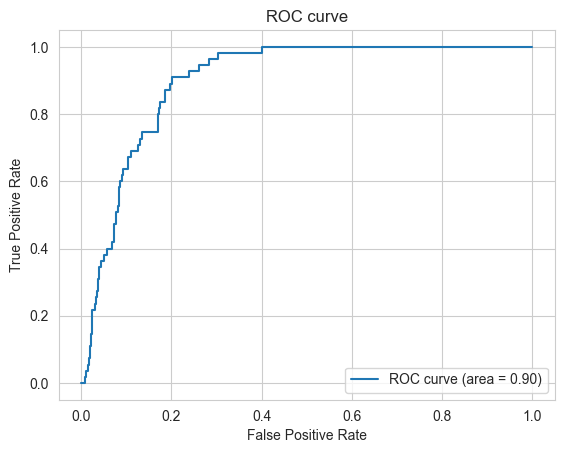

In [57]:
# without rank swapping
df_copy = pd.read_csv("cda-lab-1-credit-card-fraud/train_data.csv")
df_scaled = scale(process_df(df_copy))
train, test = train_test_split(df_scaled, test_size=0.2, stratify=df_scaled['label'], random_state=12)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
predictions, probablity_predictions = test_model2()
plot_roc_curve(test['label'], probablity_predictions[:,1])

In [50]:
# with rank swapping
df_copy = swapped_df.copy()
df_scaled = scale(process_df(df_copy))
train, test = train_test_split(df_scaled, test_size=0.2, stratify=df_scaled['label'], random_state=12)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Testing Model with regular data
True negatives:  37871 
False positives:  0 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37871
         1.0       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



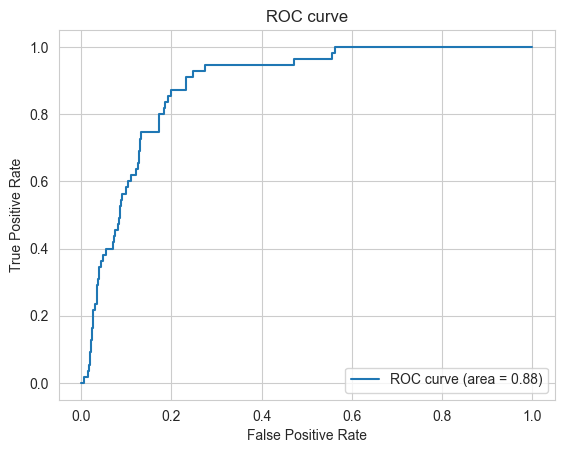

In [54]:
# logistic regression
# print(train, test)
predictions, probablity_predictions = test_model2()
plot_roc_curve(test['label'], probablity_predictions[:,1])

Testing Model with regular data
True negatives:  37870 
False positives:  1 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37871
         1.0       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



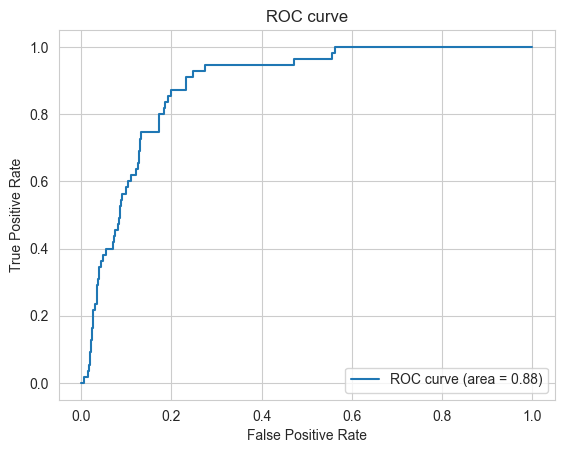

In [55]:
# AdaBoost
predictions = test_model2(classifier=AdaBoostClassifier())
plot_roc_curve(test['label'], probablity_predictions[:,1])

Testing Model with regular data
True negatives:  37871 
False positives:  0 
False negatives:  55 
True Positives:  0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     37871
         1.0       0.00      0.00      0.00        55

    accuracy                           1.00     37926
   macro avg       0.50      0.50      0.50     37926
weighted avg       1.00      1.00      1.00     37926



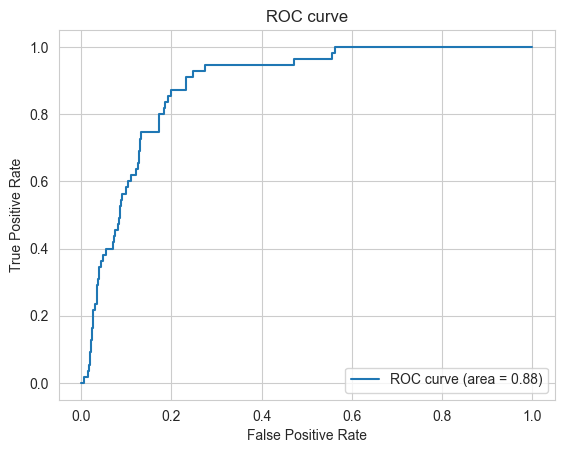

In [56]:
# MLP
predictions = test_model2(classifier=MLPClassifier())
plot_roc_curve(test['label'], probablity_predictions[:,1])

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

After scaling the data, all three classifiers (logistic regression, AdaBoost, and MLP) demonstrate similar and good performances with an AUC value of 0.88. This suggests that there is no significant distinction among the classifiers. It is possible that the dataset is relatively simple or the fraud patterns are not well-defined, allowing simpler models to perform the same as MLP. Additionally, incorporating rank-swapping to protect privacy only incurs a minimal accuracy cost, as the performance without rank-swapping is 0.90. Therefore, it is recommended to employ rank-swapping to safeguard individuals' privacy.

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below